<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/22_11_4677_Sakti_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakti Kusuma Aji | 22.11.4677 | Clustering | Tugas Praktikum Dibawah

In [70]:
import numpy as np #used for working with arrays and maths
import pandas as pd #dataframe
from matplotlib import pyplot as plt #plotting
from sklearn.datasets import make_blobs #generate data
from sklearn.cluster import KMeans #main algorithm
#determining number of clusters
from sklearn.metrics import silhouette_score

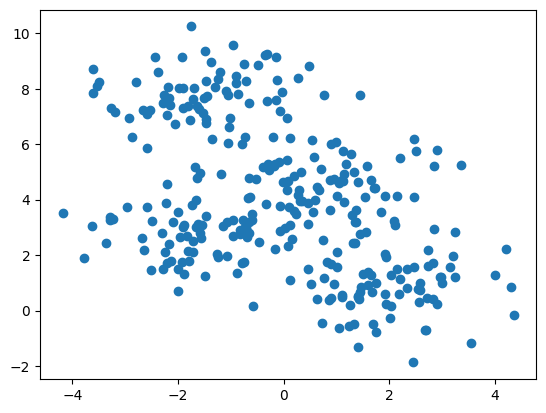

In [71]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1, random_state=0) #make_blobs() adalah dataset yang dapat dimode
# n_samples : jumlah data
# centers : jumlah cluster
# cluster_std : std cluster
plt.scatter(X[:,0], X[:,1])

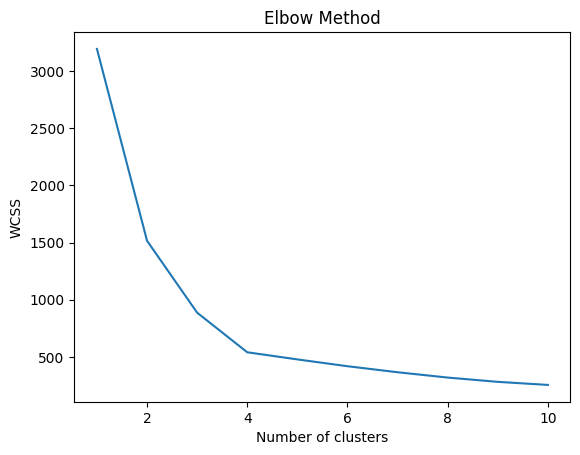

In [72]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++',
  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

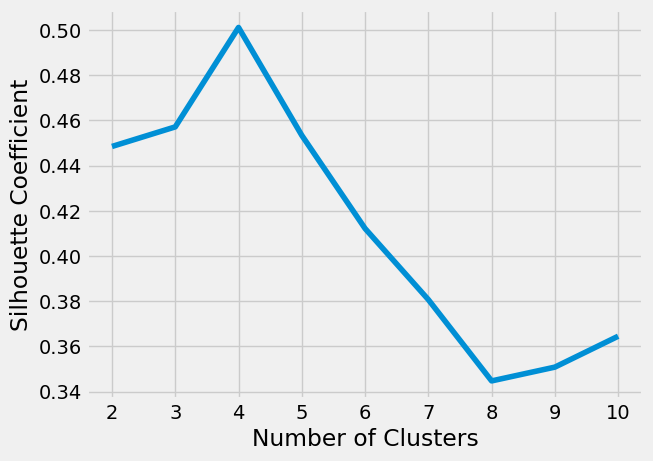

In [73]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300,
  n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

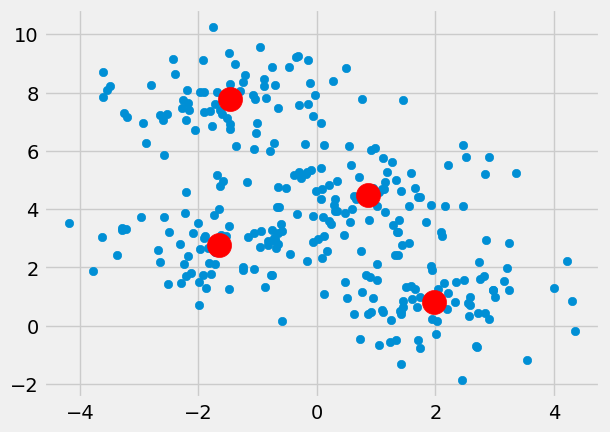

In [74]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,
n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=300, c='red')
plt.show()

# Mall Customer Segmentation

In [75]:
import numpy as np
import pandas as pd
# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
# Determine number of clusters
from sklearn.metrics import silhouette_score

In [76]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [77]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [79]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


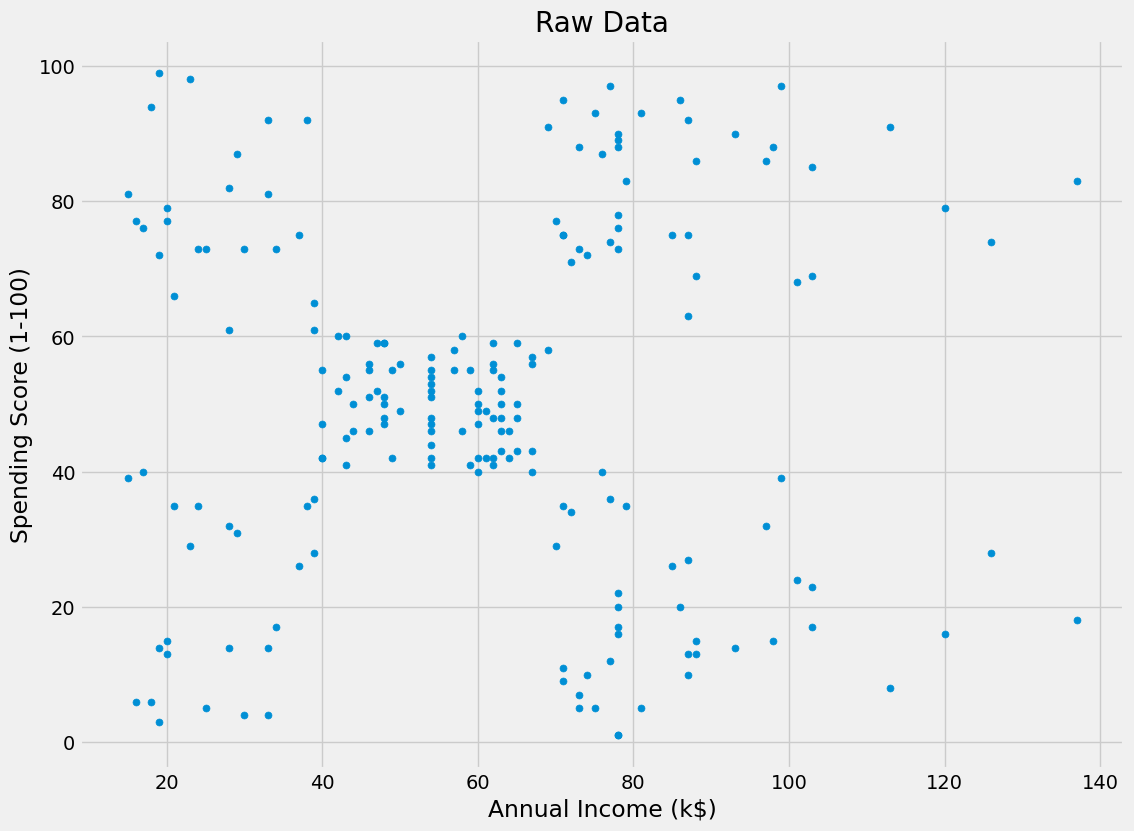

In [81]:
plt.figure(figsize=(12,9))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s = 25) #Point size is 25
plt.title('Raw Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [82]:
X = np.array(df.iloc[:,[3,4]])

In [83]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

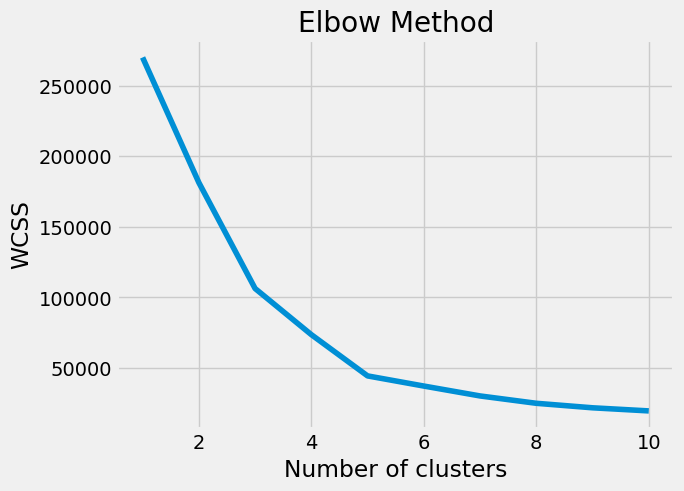

In [84]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

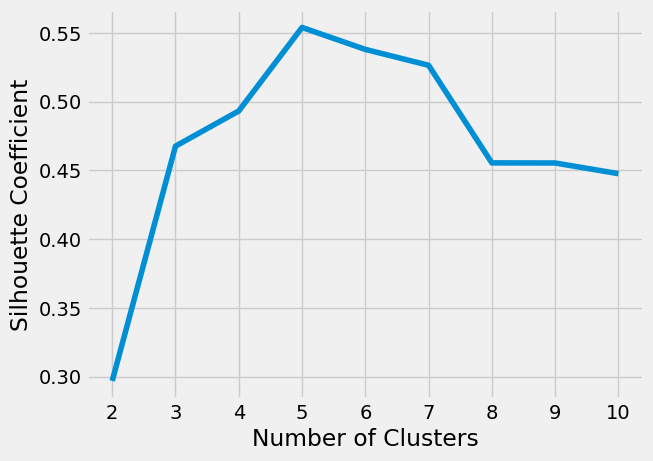

In [86]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [87]:
kmeans = KMeans(n_clusters = 5, max_iter = 500, n_init = 10, random_state = 0)
kmeans_preds = kmeans.fit_predict(X)

In [88]:
#predict result
kmeans_preds

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

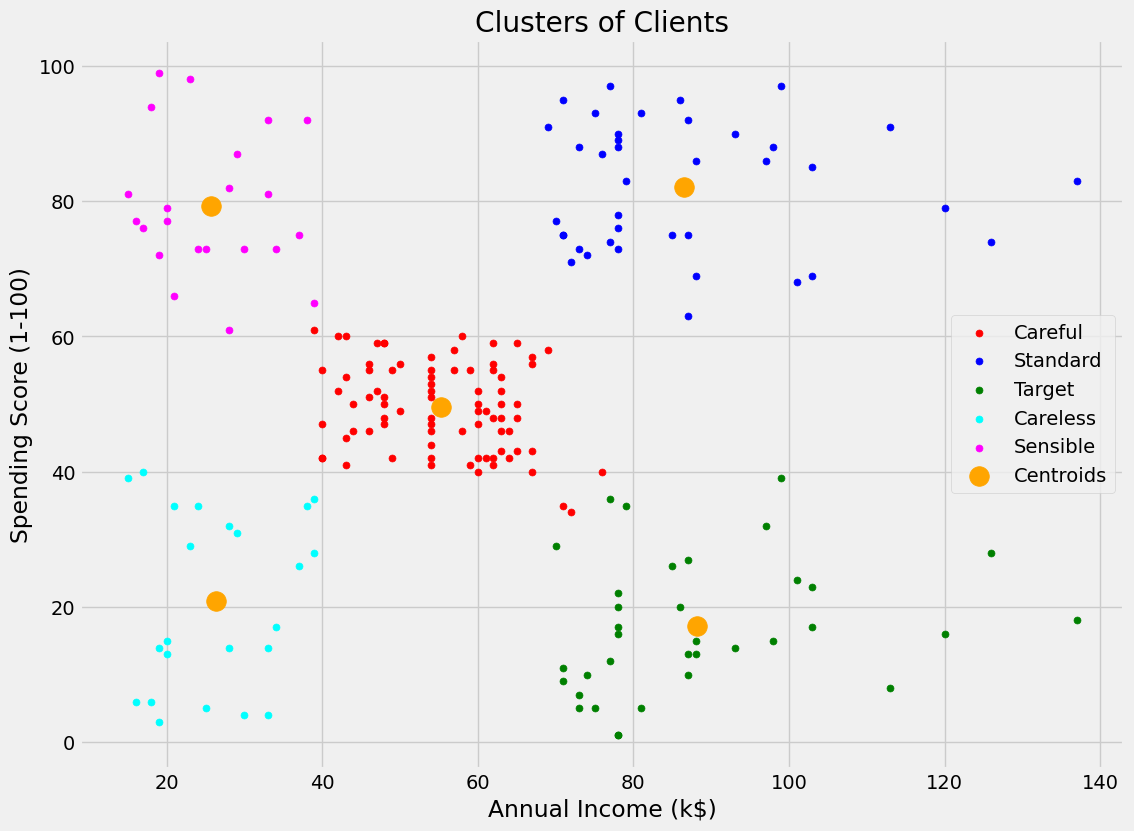

In [89]:
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']
plt.figure(figsize = (12,9))
for i in range(5):
  plt.scatter(X[kmeans_preds == i,0], X[kmeans_preds == i,1], s = point_size,
              c = colors[i], label = labels[i])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200,
            c = 'orange', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

In [90]:
#menambahkan hasil clustering ke dalam dataframe
df['Cluster'] = kmeans_preds
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [91]:
df.groupby(['Cluster'])['Cluster'].count()

,Cluster
Cluster,
0,81
1,39
2,35
3,23
4,22


In [92]:
#menampilkan cluster tertentu
df.loc[df['Cluster'] == 1].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1


In [93]:
#predict one data
print(kmeans.predict([[70,30]]))

[2]


In [94]:
#jalankan seluruh kode pada 'Implementasi 2 - Mall Customer Segmentation'-
#apabila error karena runtime habis
import plotly as py
import plotly.graph_objs as go

In [95]:
X = np.array(df.iloc[:,[2,3,4]])

In [96]:
X[:5]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40]])

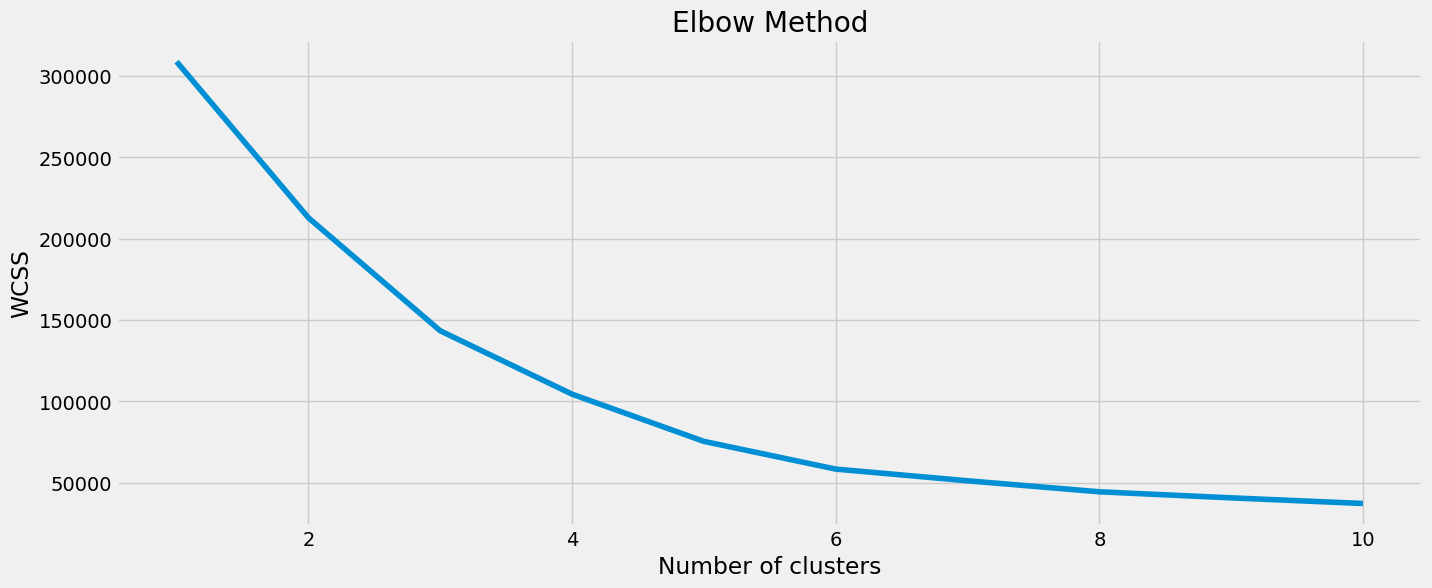

In [97]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

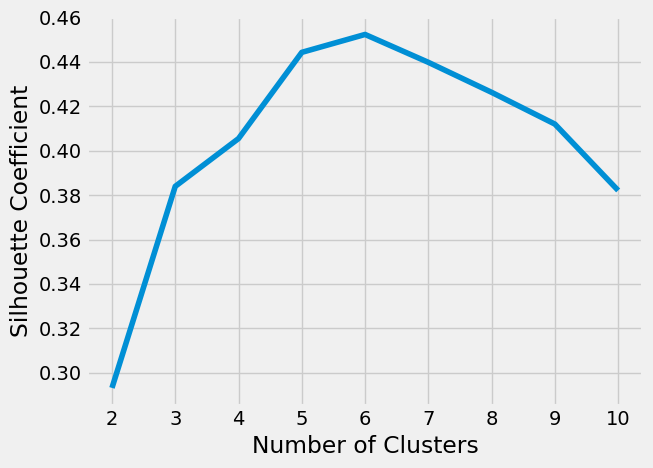

In [99]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [100]:
kmeans = KMeans(n_clusters = 6, max_iter = 500, n_init = 10, random_state = 0)
kmeans_preds = kmeans.fit_predict(X)

In [101]:
#predict result
kmeans_preds

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 3, 5, 3, 0,
       4, 5, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [102]:
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_
df['ClusterMultiFeatures'] = labels3

trace1 = go.Scatter3d(
  x= df['Age'],
  y= df['Spending Score (1-100)'],
  z= df['Annual Income (k$)'],
  mode='markers',
    marker=dict(
      color = df['ClusterMultiFeatures'],
      size= 20,
      line=dict(
      color= df['ClusterMultiFeatures'],
      width= 12
    ),
    opacity=0.8
  )
)

data = [trace1]
layout = go.Layout(
  title= 'Clusters',
  scene = dict(
    xaxis = dict(title = 'Age'),
    yaxis = dict(title = 'Spending Score'),
    zaxis = dict(title = 'Annual Income')
  )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [103]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,ClusterMultiFeatures
0,1,Male,19,15,39,3,4
1,2,Male,21,15,81,4,5
2,3,Female,20,16,6,3,4
3,4,Female,23,16,77,4,5
4,5,Female,31,17,40,3,4


In [104]:
df.groupby(['ClusterMultiFeatures'])['ClusterMultiFeatures'].count()

,ClusterMultiFeatures
ClusterMultiFeatures,
0,38
1,35
2,39
3,45
4,21
5,22


In [105]:
#menampilkan cluster tertentu
df.loc[df['ClusterMultiFeatures'] == 3].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,ClusterMultiFeatures
40,41,Female,65,38,35,3,3
42,43,Male,48,39,36,3,3
46,47,Female,50,40,55,0,3
50,51,Female,49,42,52,0,3
53,54,Male,59,43,60,0,3


In [106]:
#predict one data
print(kmeans.predict([[39,80,80]]))

[2]


# Tugas

In [48]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [49]:
# 1. Load dataset iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [50]:
# 2. Membuat DataFrame
df = pd.DataFrame(X, columns=feature_names)

In [52]:
# 3. Melakukan clustering dengan KMeans
# Parameter: n_clusters 3 keatas (sesuai soal)
# Parameter lainnya bebas, di sini kita gunakan init='k-means++', random_state=42, dan max_iter=300
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, max_iter=300)
kmeans.fit(df)
clusters = kmeans.labels_

In [53]:
# Menambahkan kolom 'cluster' ke dalam DataFrame
df['cluster'] = clusters

In [66]:
# 4. Dimensionality Reduction dengan PCA menjadi 2 dimensi
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [67]:
# Membuat DataFrame hasil PCA untuk visualisasi
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['cluster'] = clusters

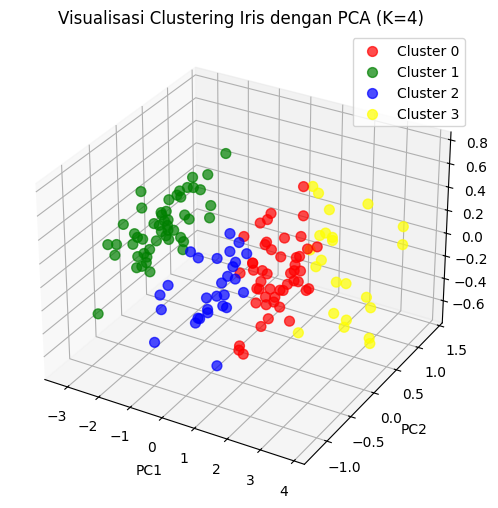

In [69]:
# 5. Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
colors = ['red', 'green', 'blue', 'yellow']
for c in range(4):
    subset = df_pca[df_pca['cluster'] == c]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
               c=colors[c], label=f'Cluster {c}', alpha=0.7, s=50)
plt.title("Visualisasi Clustering Iris dengan PCA (K=4)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

In [60]:
print(df.head(40))

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 